<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

# RadiusNeighborsRegressor with MinMaxScaler & QuantileTransformer

This Code template is for the regression analysis using a RadiusNeighbors Regression with MinMaxScaler for feature rescaling along with QuantileTransformer as a feature transformation technique in a pipeline

### Required Packages

In [2]:
import warnings as wr
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler,QuantileTransformer
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
wr.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [27]:
#filepath
file_path=''

List of features which are  required for model training .

In [28]:
#x_values
features=[]

Target feature for prediction.

In [29]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [30]:
df=pd.read_csv(file_path) # reading file
df.head() # displaying initial entries

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [31]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

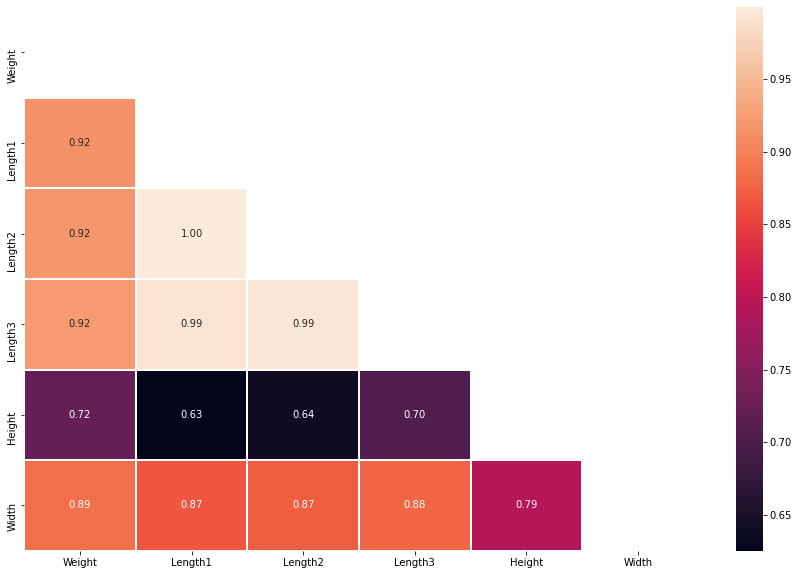

In [32]:
plt.figure(figsize = (15, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [33]:
#spliting data into X(features) and Y(Target)
X=df[features]
Y=df[target]  

Calling preprocessing functions on the feature and target set.

In [34]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,Weight,Length1,Length2,Length3,Height,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,1,0,0,0,0,0,0


### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [35]:
#we can choose randomstate and test_size as over requerment
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1) #performing datasplitting


### Data Rescaling
**Used MinMaxScaler**
* Transform features by scaling each feature to a given range.

* This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

Refer [API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

### Feature Transformation
**Power Transformer :**

* A quantile transform will map a variable’s probability distribution to another probability distribution.

* The transformation can be applied to each numeric input variable in the training dataset and then provided as input to a machine learning model to learn a predictive modeling task.
* Refer [API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html)

## Model
**RadiusNeighborsRegressor** 

RadiusNeighborsRegressor implements learning based on the neighbors within a fixed radius of the query point, where is a floating-point value specified by the user.

**Tuning parameters :-**
* **radius:** Range of parameter space to use by default for radius_neighbors queries.

* **algorithm:** Algorithm used to compute the nearest neighbors:

* **leaf_size:** Leaf size passed to BallTree or KDTree.

* **p:** Power parameter for the Minkowski metric.

* **metric:** the distance metric to use for the tree.

* **outlier_label:** label for outlier samples

* **weights:** weight function used in prediction.

In [36]:
#training the RadiusNeighborsRegressor

model = make_pipeline(MinMaxScaler(),QuantileTransformer(),RadiusNeighborsRegressor(radius=1.5))
model.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('quantiletransformer', QuantileTransformer()),
                ('radiusneighborsregressor',
                 RadiusNeighborsRegressor(radius=1.5))])

#### Model Accuracy
score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [37]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 80.95 %



### Model evolution


**r2_score:** The r2_score function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.

**MAE:** The mean abosolute error function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.

**MSE:** The mean squared error function squares the error(penalizes the model for large errors) by our model.

In [45]:
y_pred=model.predict(X_test)
print("R-squared score : ",r2_score(y_test,prediction))
print('Mean Absolute Error:', mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', mean_squared_error(y_test, prediction))  

R-squared score :  0.8094533225822599
Mean Absolute Error: 0.5142606687625819
Mean Squared Error: 0.4341346502227084


### Prediction Plot
First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis. For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

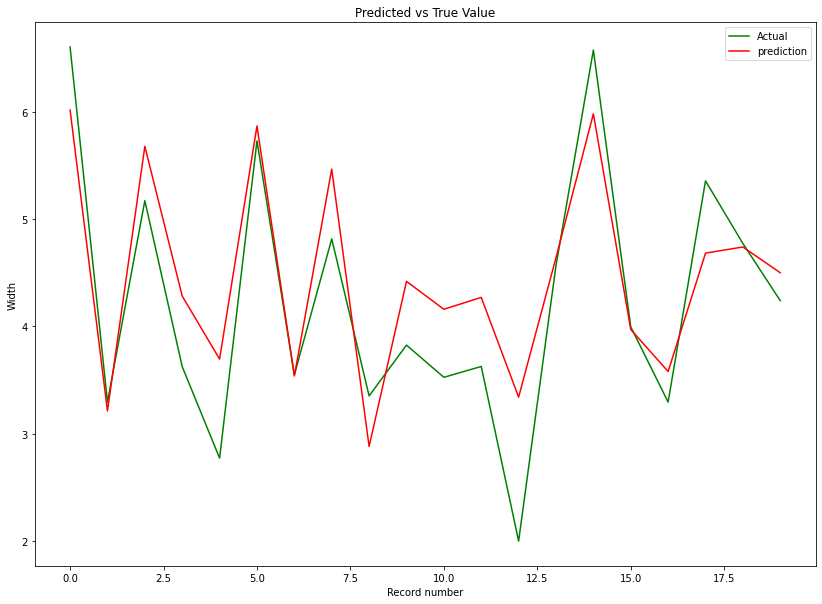

In [44]:
n=len(X_test) if len(X_test)<20 else 20
plt.figure(figsize=(14,10))
plt.plot(range(n),y_test[0:n], color = "green")
plt.plot(range(n),y_pred[0:n], color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Aishwarya Guntoju , Github: [Profile](https://github.com/DSAishwaryaG)